# **Assignment Chapter 2  - Data Preprocessing**

Dataset :
Health Case Study: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

**Assessment Requirement**
1. Data Preparation
Peserta dapat mengidentifikasi masalah data jika ada, lalu mereka juga mampu menangani masalah tersebut, dan dapat menjelaskan metode yang dipilih untuk mengatasi masalah data.

2. Exploratory Data Analysis (EDA)
Peserta dapat menghasilkan insight dari deskriptif statistik dan memilih visualisasi yang benar.

3. Feature Engineering
* Peserta dapat menggunakan teknik dalam pembuatan fitur baru.
* Peserta dapat membuat fitur yang relevan dan signifikan dalam penyelesaian masalah atau pencapaian objective.
* Peserta dapat mengukur relevansi dan signifikansi fitur yang telah dibuat secara kuantitatif maupun kualitatif.
* Peserta dapat mengkomunikasikan pentingnya fitur yang dibuat dalam menyelesaikan permasalahan atau dalam pemenuhan pencapaian objective.

# Data

In [ ]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSlKqtz5CEcdq3-untwM9K62WR0qDzra67zvTs_z4qY7UmYBHTKua2fZ3ARfkFHMQYeriVKWO_VcKfP/pub?output=csv"
df = pd.read_csv(url)

# Menampilkan lima baris pertama dari DataFrame
df.head(2000)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Preparation

Peserta dapat memilih dataset yang telah disediakan. Siapkan data berdasarkan langkah berikut:
* Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.
* Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.
* Outlier: Memeriksa outlier dan menangani outlier jika ada.
* Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
* Feature encoding: Melakukan feature encoding jika diperlukan.

In [ ]:
# Mengetahui baris dan kolom pada data
r,c = df.shape
print('Data memiliki {} baris dan {} kolom'.format(r,c))

Data memiliki 1025 baris dan 14 kolom


In [ ]:
# Mengetahui keunikan atau ragam data pada setiap kolomnya
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Missing Value

In [ ]:
# Mengecek Missing Value
missing_values = df.isnull().sum()
missing_percent = missing_values / len(df)
missing_data_info = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': missing_values,
    'Missing Values (%)': missing_percent
})
print(missing_data_info)

         Column Name  Missing Values  Missing Values (%)
age              age               0                 0.0
sex              sex               0                 0.0
cp                cp               0                 0.0
trestbps    trestbps               0                 0.0
chol            chol               0                 0.0
fbs              fbs               0                 0.0
restecg      restecg               0                 0.0
thalach      thalach               0                 0.0
exang          exang               0                 0.0
oldpeak      oldpeak               0                 0.0
slope          slope               0                 0.0
ca                ca               0                 0.0
thal            thal               0                 0.0
target        target               0                 0.0


**Analisis**
***
Dari pengecekan missing value di atas terlihat bahwa pada dataset Health tidah terdapat missing value, jadi tidak memerlukan penanganan lebih lanjut.

## Duplicate value

In [ ]:
# Mengecek data Duplicates
duplicate_rows = df[df.duplicated()]
print("Data duplikat:")
duplicate_rows.head(2000).count()

Data duplikat:


age         723
sex         723
cp          723
trestbps    723
chol        723
fbs         723
restecg     723
thalach     723
exang       723
oldpeak     723
slope       723
ca          723
thal        723
target      723
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Mengecek Duplikat data dan distinct row
distinct_count = len(df.drop_duplicates())
duplicate_count = len(df) - distinct_count
f'{distinct_count} baris berbeda {duplicate_count} baris yang terduplikat'

'302 baris berbeda 723 baris yang terduplikat'

Total Variance Sebelum Penghapusan Data Duplikat:
age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

Total Variance Setelah Penghapusan Data Duplikat:
age           81.865757
sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
dtype: float64


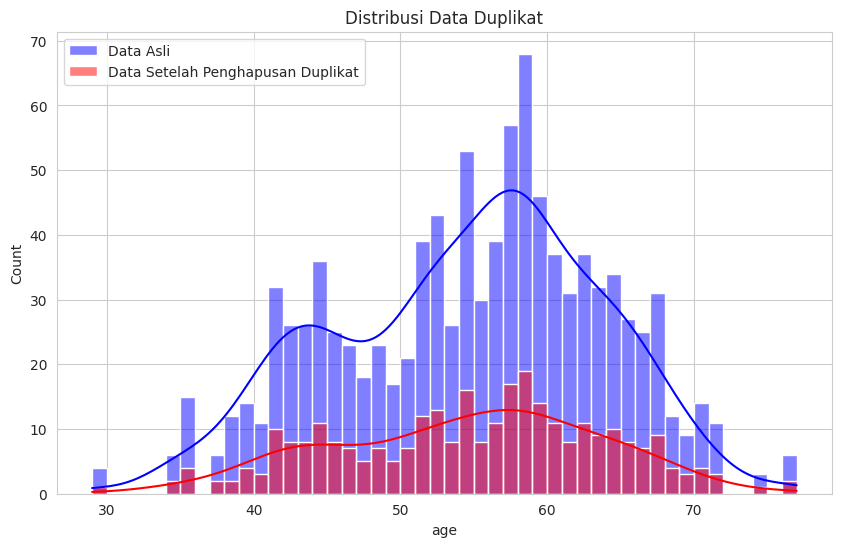

In [ ]:
# Menghitung total variance sebelum penghapusan data duplikat
variance_before = df.var()

# Menghapus data duplikat
df_no_duplicates = df.drop_duplicates()

# Menghitung total variance setelah penghapusan data duplikat
variance_after = df_no_duplicates.var()

# Menampilkan total variance sebelum dan sesudah penghapusan data duplikat
print("Total Variance Sebelum Penghapusan Data Duplikat:")
print(variance_before)
print("\nTotal Variance Setelah Penghapusan Data Duplikat:")
print(variance_after)

# Visualisasi data duplikat
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=range(df['age'].min(), df['age'].max() + 1), ax=ax, kde=True, color='blue', label='Data Asli')
sns.histplot(data=df_no_duplicates, x='age', bins=range(df['age'].min(), df['age'].max() + 1), ax=ax, kde=True, color='red', label='Data Setelah Penghapusan Duplikat')
plt.title('Distribusi Data Duplikat')
plt.legend()
plt.show()

**Analisis**
***
Dari beberapa pengecekan Duplicate value di atas, pada dataset Health terdapat 723 baris/data yang duplikat dari total 1025 data. Maka diperlukan tahapan penanganan yaitu menggunakan drop. Namun ada beberapa alasan untuk tidak menggunakan drop, sebab tiap data yang sama belum tentu merupakan orang yang sama sebab pada dataset tidak tertera id pada tiap datanya. Selain itu pada histogram yang telah ditampilkan menyatakan bahwa ada perubahan yang cukup signifikan antara sebelum dah sesudah dilakukan drop atau penghapusan duplikat walaupun pada perhitungan variance perubahannya tidak terlalu banyak.

## Outlier

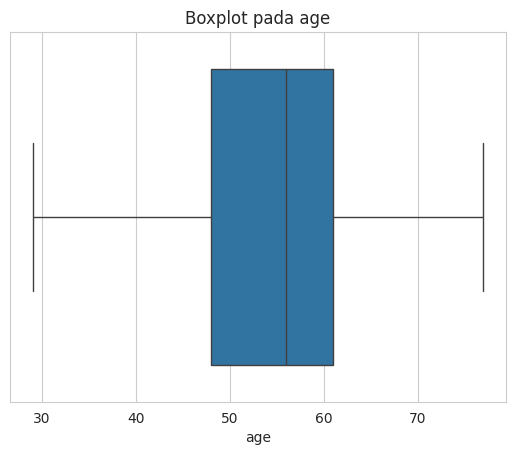

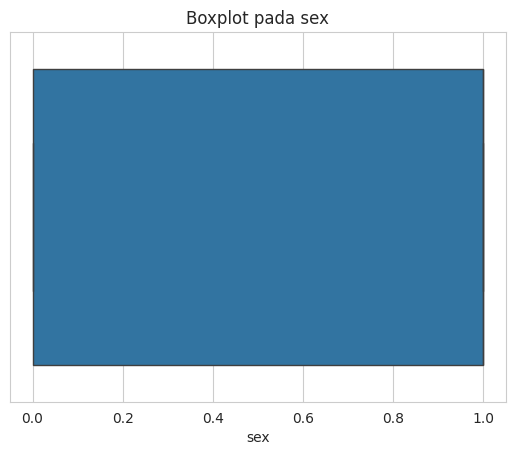

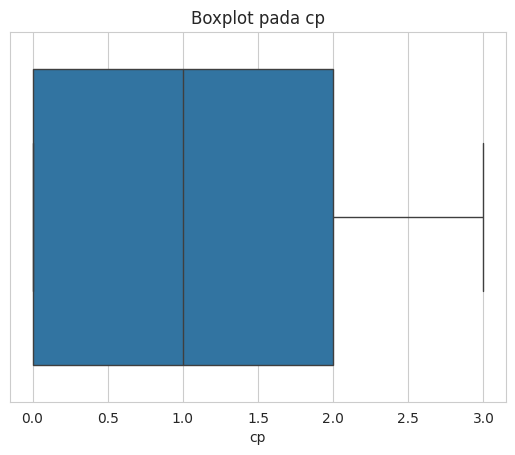

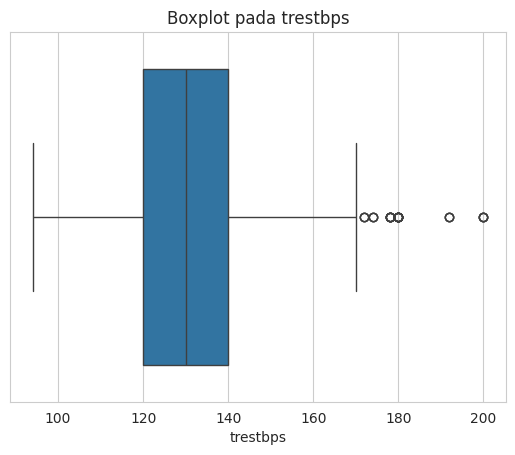

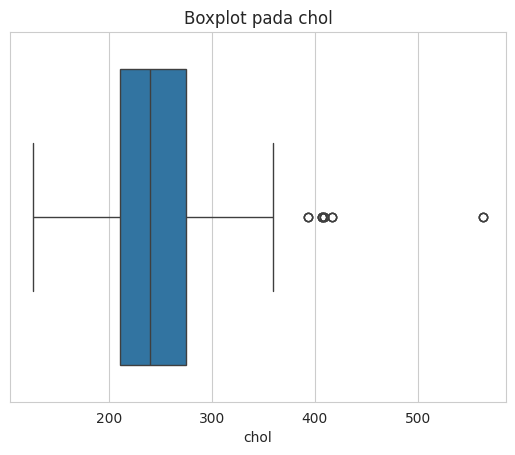

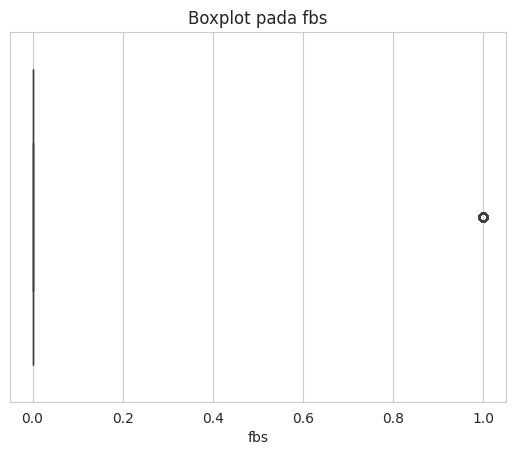

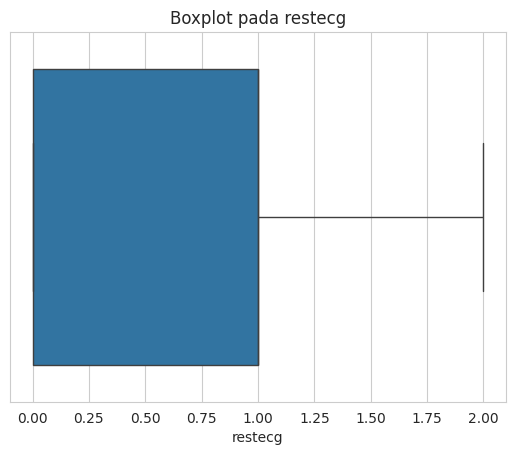

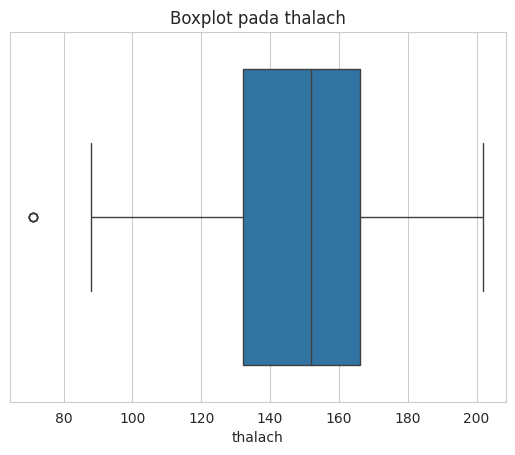

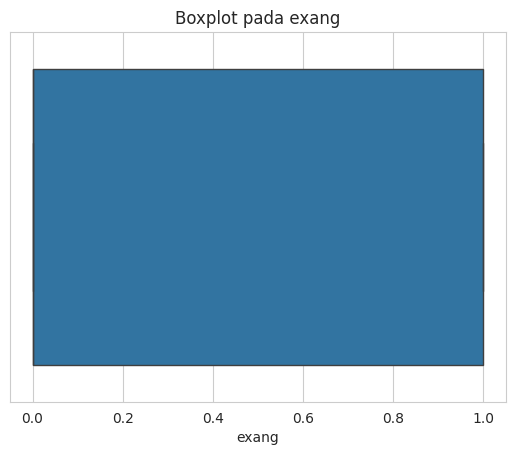

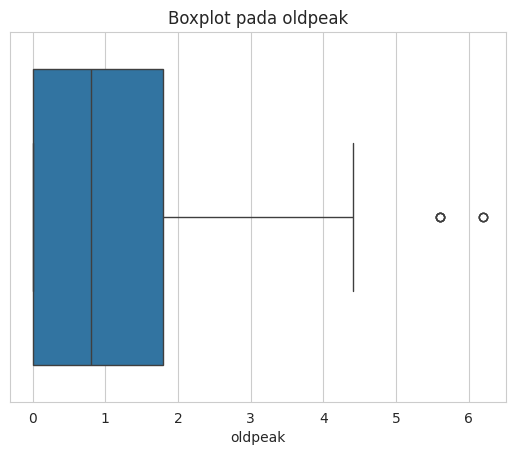

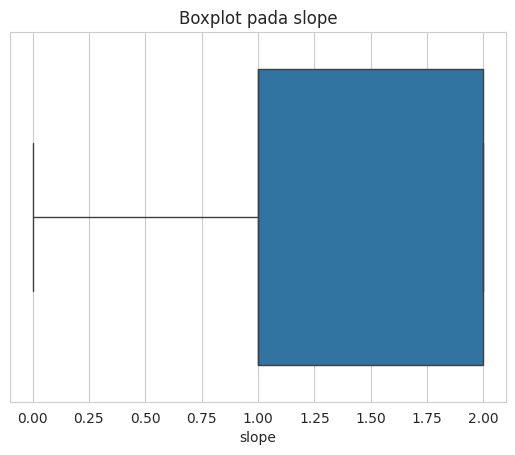

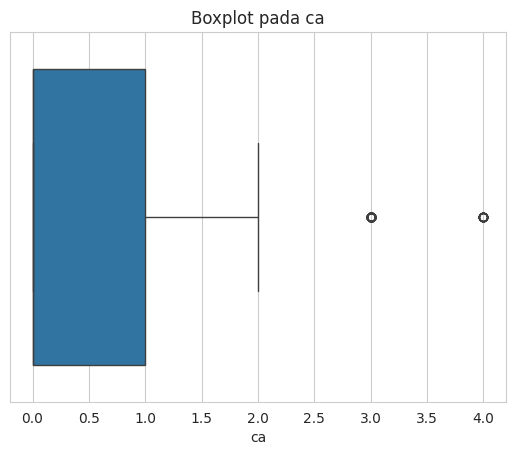

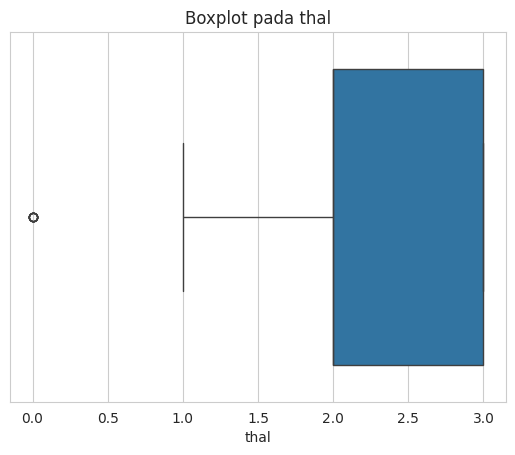

In [ ]:
# List variabel untuk membuat boxplot
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Boxplot dari masing masing feature untuk mengecek outlier
for feature in numerical_features:
    sns.boxplot( x=df[feature], data=df)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

In [ ]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          0
trestbps    30
chol        16
thalach      4
oldpeak      7
dtype: int64

**Insight**
***
Dilihat dari Boxplot di atas, masih terdapat beberapa outlier pada variabel trestbps, chol, fbs, thalach, oldpeak, ca, dan thal.
Untuk outlier pada variabel ca dan thal perlu dihilangkan karena pada variabel ca seharusnya range nilainya cuman 0-3 tapi pada data 0-4 (perlu mengeliminasi 4) dan pada variabel thal seharusnya variabel itu nilainya 1-3 tapi pada data 0-3 (perlu mengeliminasi 0). sehingga diluar dari range tersebut perlu untuk dieliminasi. Sedangkan untuk fbs tidak dieliminasi sebab akan hilang. Untuk trestbps, chol, thalach, dan oldpeak perlu dieliminasi untuk menangani outlier.

In [ ]:
# Eliminasi nilai ca > 3 dan thal = 0
df2 = df[(df['ca'] <= 3) & (df['thal'] != 0)]

In [ ]:
# Memastikan ca > 3  dan thal = 0 sudah tereliminasi
ca_4 = df2[df2['ca'] > 3]
thal_0 = df2[df2['thal'] == 0]
print(ca_4)
print(thal_0)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [ ]:
df2.shape

(1000, 14)

Setelah mengeliminasi ca dan thal, selanjutnya melakukan drop pada chol, trestbps, thalach, dan oldpeak.

In [ ]:
# Chol
q1 = np.percentile(df2['chol'], 25)
q3 = np.percentile(df2['chol'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df6 = df2[(df2['chol'] >= lower_bound) & (df2['chol'] <= upper_bound)]

In [ ]:
# Trestbps
q1 = np.percentile(df2['trestbps'], 25)
q3 = np.percentile(df2['trestbps'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df7 = df6[(df6['trestbps'] >= lower_bound) & (df6['trestbps'] <= upper_bound)]

In [ ]:
# Thalach
q1 = np.percentile(df7['thalach'], 25)
q3 = np.percentile(df7['thalach'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df8 = df7[(df7['thalach'] >= lower_bound) & (df7['thalach'] <= upper_bound)]

In [ ]:
# Oldpeak
q1 = np.percentile(df8['oldpeak'], 25)
q3 = np.percentile(df8['oldpeak'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df3 = df8[(df8['oldpeak'] >= lower_bound) & (df8['oldpeak'] <= upper_bound)]

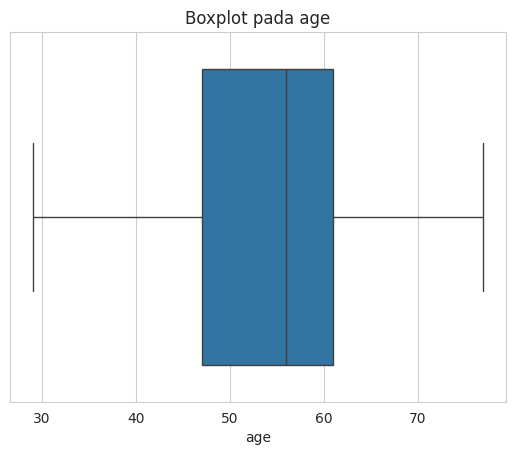

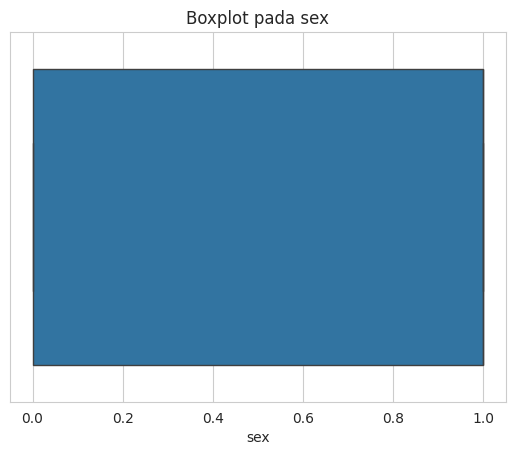

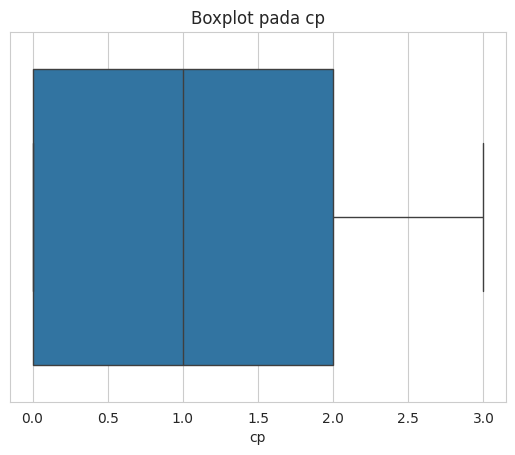

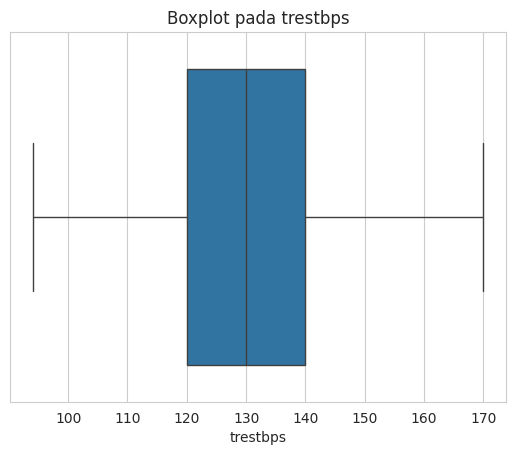

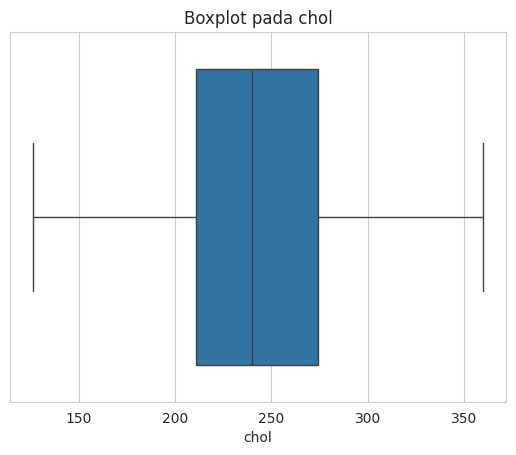

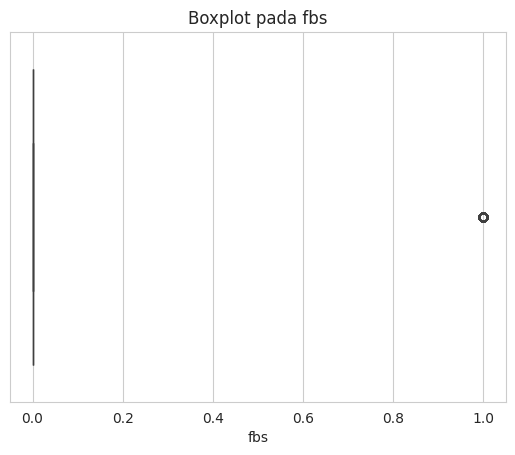

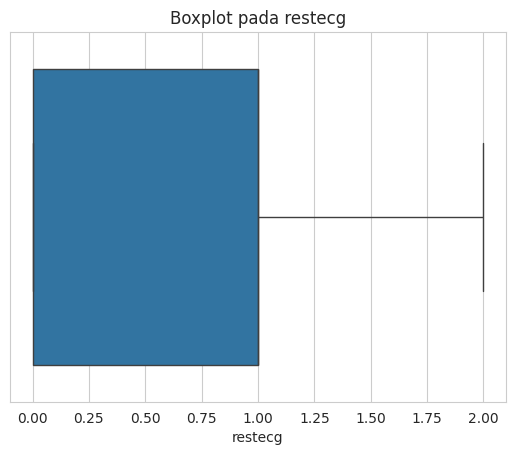

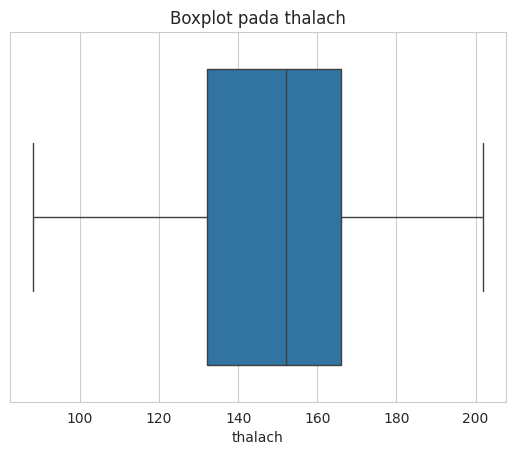

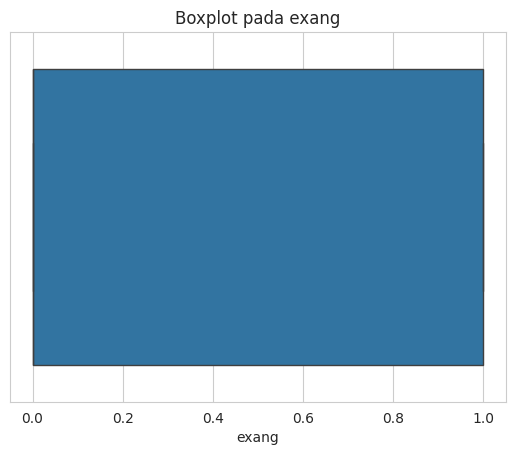

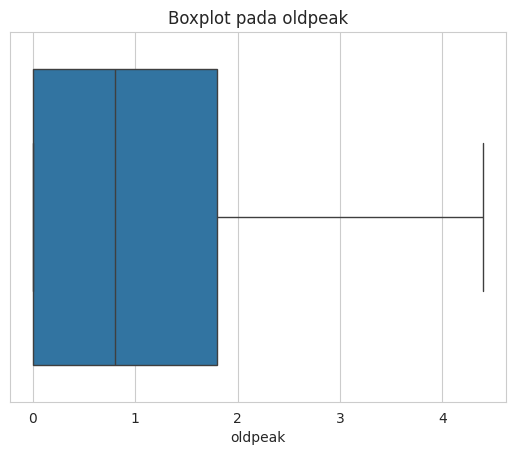

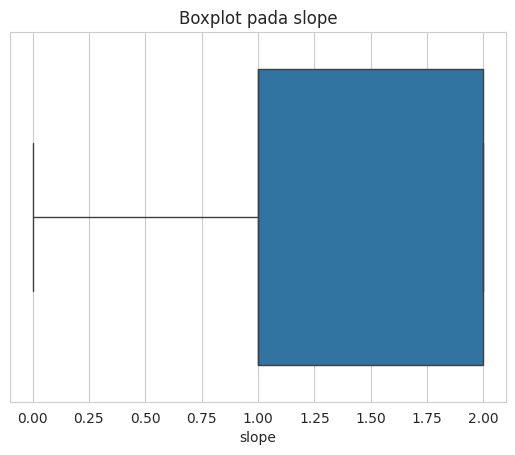

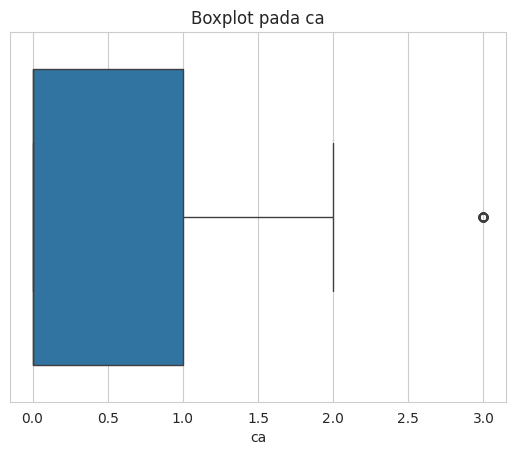

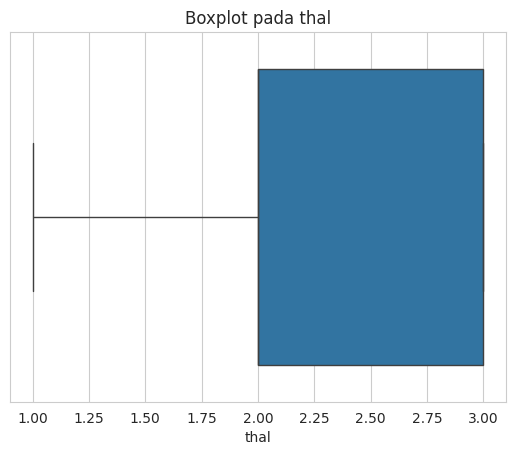

In [ ]:
# List variabel untuk membuat boxplot
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Boxplot dari masing masing feature untuk mengecek outlier
for feature in numerical_features:
    sns.boxplot( x=df3[feature], data=df3)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

In [ ]:
df3.shape

(943, 14)

**Insight**
***
Dengan menggunakan Interquartile Range (Rentang Interkuartil) outlier dapat ditangani dan sekarang
 chol, trestbps, thalach, dan oldpeak sudah tidak ada outlier.

## Imbalance data

In [ ]:
# Cek Imbalance
print(df3['target'].value_counts())

1    490
0    453
Name: target, dtype: int64


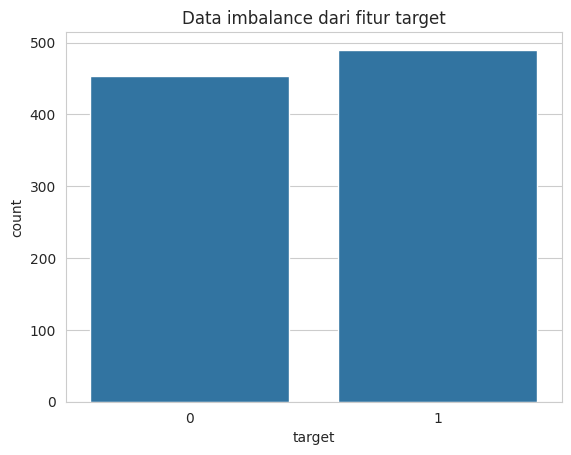

In [ ]:
sns.countplot(x='target', data=df3)
plt.title('Data imbalance dari fitur target')
plt.show()

**Insight**
***
Dari hasil di atas menunjukkan 0 merupakan orang yang tidak memiliki penyakit jantung, dan 1 merupakan orang yang memiliki penyakit jantung. Didapat bahwa jumlah keduanya tidak jauh berbeda, walaupun tidak sama, data ini bisa dikatakan sudah seimbang.

## Feature encoding

In [ ]:
# One-Hot Encoding
# Categorical columns
cp = pd.get_dummies(df3['cp'], prefix='cp')
thal = pd.get_dummies(df3['thal'], prefix='thal')
slope = pd.get_dummies(df3['slope'], prefix='slope')

# Menggabungkan Dummy ke Data Frame
frames = [df3, cp, thal, slope]
df4 = pd.concat(frames, axis = 1)

# Drop variabel yang tidak digunakan
df4=df4.drop(columns = ['cp','thal','slope'])

# Menampilkan lima baris pertama dari dataset setelah One-Hot Encoding
print("Dataset setelah One-Hot Encoding:")
df4.head()

Dataset setelah One-Hot Encoding:


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,1,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,1,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,1,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,1,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
# Label Encoding
# Mencari fitur-fitur kategorikal untuk dilakukan label encoding
categorical_features = df3.select_dtypes(include=['object']).columns.tolist()

# Menerapkan label encoding pada fitur-fitur kategorikal
label_encoder = LabelEncoder()
for feature in categorical_features:
    df3[feature] = label_encoder.fit_transform(df[feature])

# Menampilkan lima baris pertama dari dataset setelah label encoding
print("Dataset setelah label encoding:")
df3.head()

Dataset setelah label encoding:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Insight**
***
Di atas merupakan feature encoding dengan One-Hot Encoding dan Label Encoding. Pada One-Hot Encoding terjadi penambahan dummy namun pada akhirnya terjadi drop pada variabel yang tidak diperlukan. One-Hot Encoding teknik dalam pengkodean fitur kategorikal di mana setiap nilai kategori diubah menjadi sebuah vektor biner [0,1]. Sedangkan Label encoding teknik pengkodean di mana setiap nilai kategori diubah menjadi bilangan bulat unik.

# Exploratory Data Analysis (EDA)

Menggunakan dataset yang sama, Peserta diminta untuk:
* Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
* Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
* Menemukan dan mendeskripsikan statistical five summaries
* Mendeskripsikan distribusi data

In [ ]:
df3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,54.247084,0.711559,0.952280,129.825027,243.410392,0.136797,0.524920,149.330859,0.328738,1.020573,1.406151,0.691410,2.320255,0.519618
std,9.099324,0.453278,1.031794,15.496254,45.296267,0.343816,0.522492,22.759538,0.470004,1.078038,0.607319,0.932545,0.594814,0.499880
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


**Insight**
***
Ringkasan statistik deskriptif dari df2. yang berisi
Count(Jumlah baris non-null dalam setiap kolom), mean,
Std (Standar deviasi),Min (Nilai minimum),
25% (Q1), 50% (Median), 75% (Q3),Max (Nilai maksimum)

<Axes: >

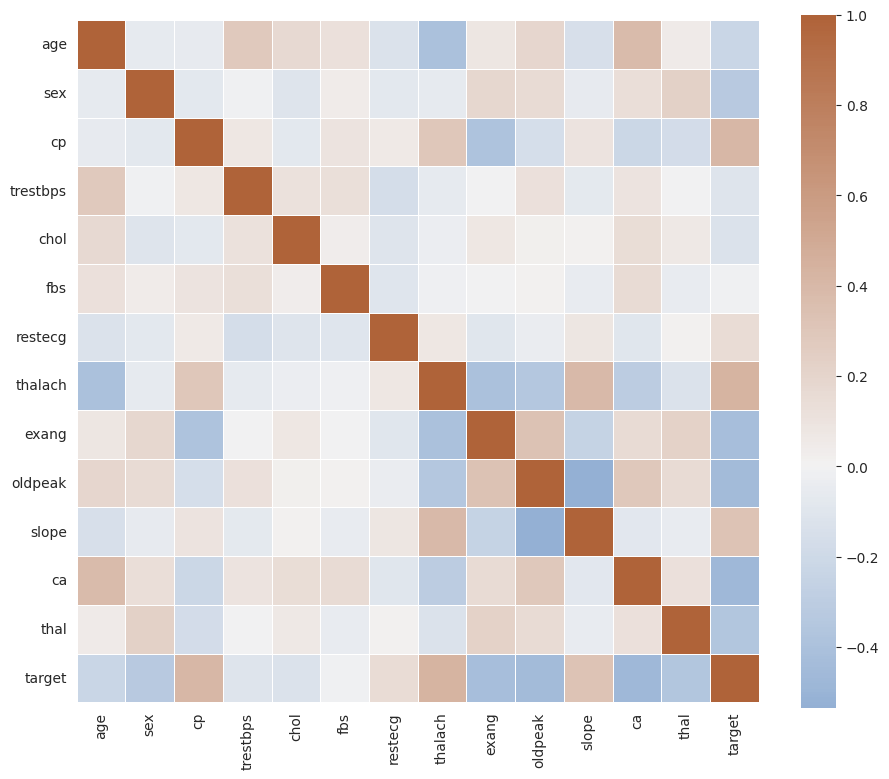

In [ ]:
corr = df3.corr()
plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 30, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5)

**Insight**
***
Dari korelasi di atas terlihat jelas bahwa chest pain (cp), maximum heart rate achieved (thalach) dan slope memiliki korelasi positif pada target (penyakit jantung), sedangkan exercise induced angina (exang), oldpeak, number of major vessels colored by flourosopy (ca) dan thalasemia (thal) mempunyai korelasi negatif.

## Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
# Memisahkan fitur berdasarkan tipe datanya
nominal_features = []  # Fitur-fitur nominal
ordinal_features = []  # Fitur-fitur ordinal
numerical_features = []  # Fitur-fitur numerik

for column in df3.columns:
    if df3[column].dtype == 'object':
        nominal_features.append(column)
    elif df3[column].dtype == 'int64' or df3[column].dtype == 'float64':
        # Menyaring fitur yang bukan ID
        if len(df3[column].unique()) > 10:  # Mengasumsikan bahwa jika lebih dari 10 nilai unik, fitur tersebut numerik
            numerical_features.append(column)
        else:
            ordinal_features.append(column)

print("\nFitur-fitur Nominal:")
print(nominal_features)
print("\nFitur-fitur Ordinal:")
print(ordinal_features)
print("\nFitur-fitur Numerik:")
print(numerical_features)


Fitur-fitur Nominal:
[]

Fitur-fitur Ordinal:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

Fitur-fitur Numerik:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
# Mengidentifikasi fitur-fitur nominal, ordinal, dan numerik
nominal_features = []
ordinal_features = []
numeric_features = []

for column in df3.columns:
    unique_values = df3[column].nunique()
    data_type = df3[column].dtype

    if data_type == 'object':
        nominal_features.append(column)
    elif data_type == 'int64' or data_type == 'float64':
        if unique_values > 10:
            numeric_features.append(column)
        else:
            # Memeriksa apakah nilai-nilai memiliki urutan tertentu
            ordered_values = sorted(df3[column].unique())
            if list(ordered_values) == list(range(ordered_values[0], ordered_values[-1] + 1)):
                ordinal_features.append(column)
            else:
                nominal_features.append(column)
    else:
        print(f"\nFitur '{column}':")
        print(f"   - Tipe data tidak dikenali: {data_type}")

# Menampilkan informasi tentang fitur-fitur nominal
print("\nFitur-Fitur Nominal:")
for feature in nominal_features:
    unique_values = df3[feature].nunique()
    print(f"- Fitur '{feature}':")
    print(f"    - Tipe data: kategorikal (nominal)")
    print(f"    - Jumlah nilai unik: {unique_values}")
    print(f"    - Daftar nilai unik: {list(df3[feature].unique())}")

# Menampilkan informasi tentang fitur-fitur ordinal
print("\nFitur-Fitur Ordinal:")
for feature in ordinal_features:
    unique_values = df3[feature].nunique()
    print(f"- Fitur '{feature}':")
    print(f"    - Tipe data: kategorikal (ordinal)")
    print(f"    - Jumlah nilai unik: {unique_values}")
    print(f"    - Daftar nilai unik: {list(df3[feature].unique())}")

# Menampilkan informasi tentang fitur-fitur numerik
print("\nFitur-Fitur Numerik:")
for feature in numeric_features:
    print(f"- Fitur '{feature}':")
    print(f"    - Tipe data: numerik")
    print(f"    - Statistik deskriptif:")
    print(df3[feature].describe())


Fitur-Fitur Nominal:

Fitur-Fitur Ordinal:
- Fitur 'sex':
    - Tipe data: kategorikal (ordinal)
    - Jumlah nilai unik: 2
    - Daftar nilai unik: [1, 0]
- Fitur 'cp':
    - Tipe data: kategorikal (ordinal)
    - Jumlah nilai unik: 4
    - Daftar nilai unik: [0, 1, 2, 3]
- Fitur 'fbs':
    - Tipe data: kategorikal (ordinal)
    - Jumlah nilai unik: 2
    - Daftar nilai unik: [0, 1]
- Fitur 'restecg':
    - Tipe data: kategorikal (ordinal)
    - Jumlah nilai unik: 3
    - Daftar nilai unik: [1, 0, 2]
- Fitur 'exang':
    - Tipe data: kategorikal (ordinal)
    - Jumlah nilai unik: 2
    - Daftar nilai unik: [0, 1]
- Fitur 'slope':
    - Tipe data: kategorikal (ordinal)
    - Jumlah nilai unik: 3
    - Daftar nilai unik: [2, 0, 1]
- Fitur 'ca':
    - Tipe data: kategorikal (ordinal)
    - Jumlah nilai unik: 4
    - Daftar nilai unik: [2, 0, 1, 3]
- Fitur 'thal':
    - Tipe data: kategorikal (ordinal)
    - Jumlah nilai unik: 3
    - Daftar nilai unik: [3, 2, 1]
- Fitur 'target':
    - 

**Insight**
***
Didapat bahwa pada data yang ada tidak memiliki fitur Nominal, memiliki fitur Ordinal yaitu sex, cp, fbs, restecg, exang, slope, ca, thal, dan target, untuk fitur Numeriknya yaitu age, trestbps, chol, thalach, dan oldpeak.

## Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
# Mencari Mean, Median, dan Modus
for column in df3.columns:
    mean_value = df3[column].mean()
    median_value = df3[column].median()
    mode_value = df3[column].mode()[0]

    print(f"\nStatistik untuk Kolom {column}:")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Modus: {mode_value}")


Statistik untuk Kolom age:
Mean: 54.24708377518558
Median: 56.0
Modus: 58

Statistik untuk Kolom sex:
Mean: 0.711558854718982
Median: 1.0
Modus: 1

Statistik untuk Kolom cp:
Mean: 0.9522799575821845
Median: 1.0
Modus: 0

Statistik untuk Kolom trestbps:
Mean: 129.82502651113467
Median: 130.0
Modus: 120

Statistik untuk Kolom chol:
Mean: 243.4103923647932
Median: 240.0
Modus: 234

Statistik untuk Kolom fbs:
Mean: 0.13679745493107104
Median: 0.0
Modus: 0

Statistik untuk Kolom restecg:
Mean: 0.5249204665959704
Median: 1.0
Modus: 1

Statistik untuk Kolom thalach:
Mean: 149.33085896076352
Median: 152.0
Modus: 162

Statistik untuk Kolom exang:
Mean: 0.32873806998939553
Median: 0.0
Modus: 0

Statistik untuk Kolom oldpeak:
Mean: 1.0205726405090139
Median: 0.8
Modus: 0.0

Statistik untuk Kolom slope:
Mean: 1.4061505832449628
Median: 1.0
Modus: 2

Statistik untuk Kolom ca:
Mean: 0.6914103923647932
Median: 0.0
Modus: 0

Statistik untuk Kolom thal:
Mean: 2.320254506892895
Median: 2.0
Modus: 2

St

**Insight**
***
Mendapatkan informasi tentang mean, medianm dan modus pada kolom age,  sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, dan target.

## Menemukan dan mendeskripsikan statistical five summaries

In [ ]:
# Statistik deskriptif
df3.select_dtypes(exclude='object').describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,54.247084,0.711559,0.952280,129.825027,243.410392,0.136797,0.524920,149.330859,0.328738,1.020573,1.406151,0.691410,2.320255,0.519618
std,9.099324,0.453278,1.031794,15.496254,45.296267,0.343816,0.522492,22.759538,0.470004,1.078038,0.607319,0.932545,0.594814,0.499880
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


In [ ]:
# Mendeskripsikan statistical five summaries
five_summaries = df3.describe()

# Menampilkan statistical five summaries
print("Statistical Five Summaries:")
print(five_summaries)

Statistical Five Summaries:
              age         sex          cp    trestbps        chol         fbs  \
count  943.000000  943.000000  943.000000  943.000000  943.000000  943.000000   
mean    54.247084    0.711559    0.952280  129.825027  243.410392    0.136797   
std      9.099324    0.453278    1.031794   15.496254   45.296267    0.343816   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  170.000000  360.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  943.000000  943.000000  943.000000  943.000000  943.000000  943.000000   
mean     0.524920  149.330859    0.328738    1.020573    1.406151    0.691410   

**Insight**
***
Dapat melihat jumlah data yang ada, yaitu 943.Dapat melihat nilai terendah (Min) dan nilai maksimum (Max) dalam dataset untuk mengetahui apakah ada outlier.dalam dataset, melihat distribusi data Kuartil Bawah (Q1), Median (Q2), uartil Atas (Q3) yang dapat memberikan gambaran tentang pusat distribusi data cenderung condong ke kiri (negatif skewness) atau ke kanan (positif skewness).

## Mendeskripsikan distribusi data

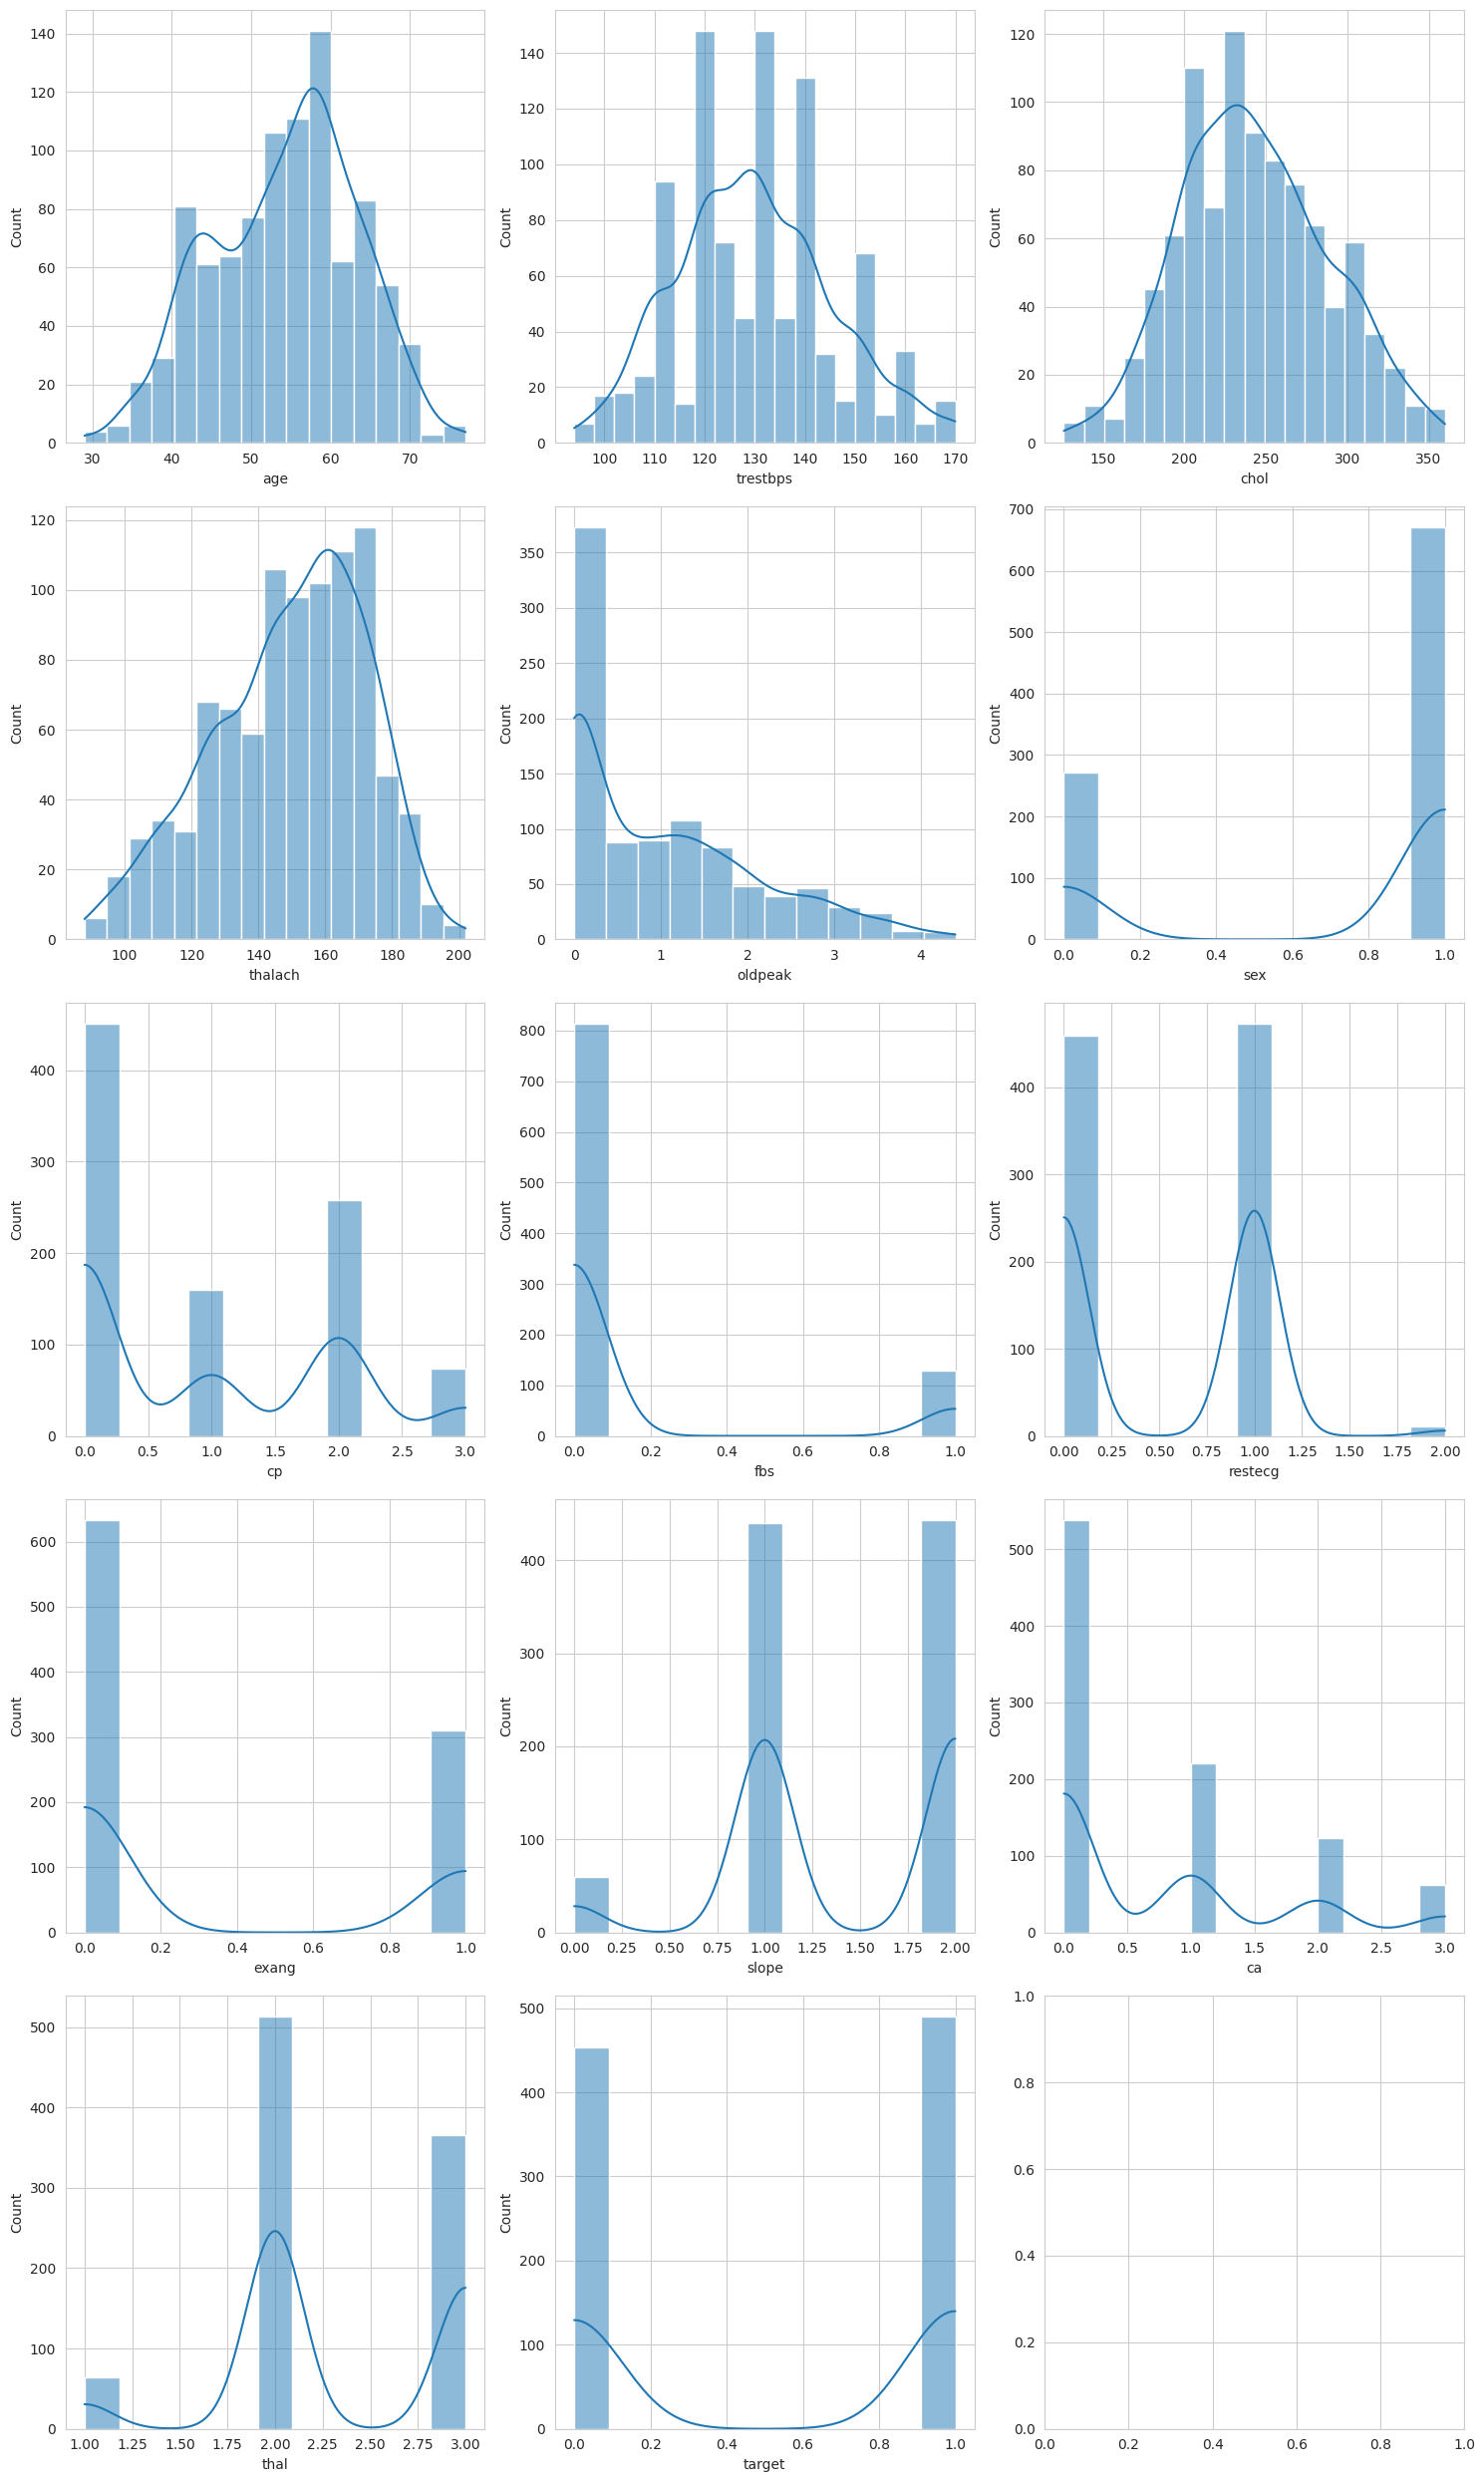

In [ ]:
# Membuat visualisasi distribusi(histogram) pada masing masing variabel
sns.set_style('whitegrid')

fig, ax = plt.subplots(5, 3, figsize=(15, 25))

sns.histplot(ax=ax[0, 0], data=df3, x='age', kde=True)
sns.histplot(ax=ax[0, 1], data=df3, x='trestbps', kde=True)
sns.histplot(ax=ax[0, 2], data=df3, x='chol', kde=True)
sns.histplot(ax=ax[1, 0], data=df3, x='thalach', kde=True)
sns.histplot(ax=ax[1, 1], data=df3, x='oldpeak', kde=True)
sns.histplot(ax=ax[1, 2], data=df3, x='sex', kde=True)
sns.histplot(ax=ax[2, 0], data=df3, x='cp', kde=True)
sns.histplot(ax=ax[2, 1], data=df3, x='fbs', kde=True)
sns.histplot(ax=ax[2, 2], data=df3, x='restecg', kde=True)
sns.histplot(ax=ax[3, 0], data=df3, x='exang', kde=True)
sns.histplot(ax=ax[3, 1], data=df3, x='slope', kde=True)
sns.histplot(ax=ax[3, 2], data=df3, x='ca', kde=True)
sns.histplot(ax=ax[4, 0], data=df3, x='thal', kde=True)
sns.histplot(ax=ax[4, 1], data=df3, x='target', kde=True)

plt.tight_layout()
plt.show()

**Insight**
***
Apabila dilihat dari histogram di atas, tidak tampak ada data yang berdistribusi normal, namun untuk memastikannya akan dicari ebih lanjut mengenai skewness dan distribusi normal.

In [ ]:
# Menghitung skewness untuk setiap kolom
skewness = df3.skew()

# Menampilkan hasil
print("Skewness untuk setiap kolom:")
print(skewness)

Skewness untuk setiap kolom:
age        -0.205622
sex        -0.935446
cp          0.525567
trestbps    0.286648
chol        0.185094
fbs         2.117265
restecg     0.146437
thalach    -0.430053
exang       0.730317
oldpeak     0.922280
slope      -0.491651
ca          1.137450
thal       -0.248610
target     -0.078659
dtype: float64


**Insight**
***
Terlihat bahwa age, sex, thalach, slope,  thal, dan target merupakan negative-skewness. Selain itu, cp, trestbps, chol, fbs,restecg, exang, oldpeak, dan ca merupakan positive skewness

In [ ]:
# Menguji normalitas untuk setiap kolom dalam DataFrame
for column in df3.columns:
    # Mengabaikan kolom yang bukan numerik
    if df3[column].dtype in ['int64', 'float64']:
        # Menguji normalitas menggunakan uji Shapiro-Wilk
        stat, p_value = shapiro(df3[column])

        # Menampilkan hasil
        print(f"Kolom {column}:")
        print(f"  - Statistik uji: {stat}")
        print(f"  - Nilai p: {p_value}")
        if p_value > 0.05:
            print("  - Distribusi mungkin normal (tidak dapat ditolak H0)")
        else:
            print("  - Distribusi tidak normal (H0 ditolak)")

Kolom age:
  - Statistik uji: 0.9858612418174744
  - Nilai p: 6.699746535332451e-08
  - Distribusi tidak normal (H0 ditolak)
Kolom sex:
  - Statistik uji: 0.5679595470428467
  - Nilai p: 3.783505853677006e-43
  - Distribusi tidak normal (H0 ditolak)
Kolom cp:
  - Statistik uji: 0.788975715637207
  - Nilai p: 3.203305492621245e-33
  - Distribusi tidak normal (H0 ditolak)
Kolom trestbps:
  - Statistik uji: 0.982638418674469
  - Nilai p: 3.7219749504657784e-09
  - Distribusi tidak normal (H0 ditolak)
Kolom chol:
  - Statistik uji: 0.9922282099723816
  - Nilai p: 7.384242053376511e-05
  - Distribusi tidak normal (H0 ditolak)
Kolom fbs:
  - Statistik uji: 0.40638989210128784
  - Nilai p: 0.0
  - Distribusi tidak normal (H0 ditolak)
Kolom restecg:
  - Statistik uji: 0.6755176186561584
  - Nilai p: 5.0902446976291845e-39
  - Distribusi tidak normal (H0 ditolak)
Kolom thalach:
  - Statistik uji: 0.9774717092514038
  - Nilai p: 6.629547605330188e-11
  - Distribusi tidak normal (H0 ditolak)
Kolo

**Insight**
***
Dari penyelesaian di atas terlihat bahwa semua kolom merupakan distribusi tidak normal sebab nilai p > 0.05

# Feature Engineering

Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membuat langkah preventif untuk mengurangi dampak dari heart disease tersebut.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

## Menambahkan Fitur

In [ ]:
df3 = df2.copy()

In [ ]:
# Inisialisasi kolom 'Age_Group' menggunakan pd.cut()
df3['Age_Group'] = pd.cut(df3['age'], bins=[0, 30, 60, 100], labels=['Young Adult', 'Adult', 'Elderly'])

# Mengonversi kategori menjadi nilai numerik
df3['Age_Group'] = df3['Age_Group'].cat.codes

**Insight**
***
Dengan memberikan informasi berupa kategori pada umur akan memudahkan pendataan dan mengetahui kategori umur 0 = Young Adult, 1 = Adult, atau 2 = Elder yang banyak menderita penyakit jantung.

In [ ]:
# Membuat kolom baru untuk menampilkan tekanan darah
df3['Normal_Blood_Pressure'] = (df3['trestbps'] >= 90) & (df3['trestbps'] <= 120)

# Mengonversi nilai boolean menjadi nilai numerik (0 dan 1)
df3['Normal_Blood_Pressure'] = df3['Normal_Blood_Pressure'].astype(int)

**Insight**
***
Memberikan informasi berupa kategori tekanan darah yang akan memudahkan pendataan dan mengetahui pengaruh tekanan darah pada penyakit jantung. Apabila hasilnya 90-120 maka bernilai 1 yang artinya normal, selain itu bernilai 0 yang berarti tekanan darah tinggi atau rendah (tidak normal).

In [ ]:
# Membuat kolom baru untuk menghitung risiko penyakit jantung berdasarkan umur, sex, chess pain, dan kolesterol
df3['Heart_Risk_Level'] = (df3['age'] * df3['sex']) + (df3['cp'] * df3['chol'])

**Insight**
***
Memberikan informasi berupa risiko penyakit jantung berdasarkan umur, jenis kelamin, sakit dada, dan kolesterol. Semakin tinggi hasilnya maka semakin tinggi risikonya

In [ ]:
# Membuat kolom baru untuk menghitung risiko penyakit jantung berdasarkan latihan fisik
df3['Exercise_Induced_Heart_Risk'] = df3['exang'] * df3['oldpeak']

**Insight**
***
Memberikan informasi berupa risiko penyakit jantung dari latihan fisik. Semakin tiinggi maka semakin tinggi pula risikonya.

In [ ]:
# Membuat kolom baru untuk menghitung ST Depression level
df3['ST_Depression_Level'] = pd.cut(df3['oldpeak'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])

**Insight**
***
Memberikan informasi menghitung ST Depression level yaitu  kemungkinan hasil tes elektrokardiogram (EKG). Ini berhubungan dengan oldpeak, bila old peak bernilai 0 maka akan muncul 0, apabila selain itu maka bernilai 1.

In [ ]:
# Membuat kolom baru untuk menghitung tingkat denyut jantung
df3['log_max_heart_rate'] = np.log(df3['thalach'])

**Insight**
***
Memberikan informasi menghitung tingkat denyut jantung.

In [ ]:
# Membuat kolom baru untuk menghitung jumlah faktor risiko berdasarkan tekanan darah, kolesterol, gula darah, dan thalasemia
df3['total_risk_factor'] = 0
# Menghitung jumlah faktor risiko
df3.loc[df3['trestbps'] > 140, 'total_risk_factor'] += 1
df3.loc[df3['chol'] > 240, 'total_risk_factor'] += 1
df3.loc[df3['fbs'] > 120, 'total_risk_factor'] += 1
df3.loc[df3['thal'] == 3, 'total_risk_factor'] += 1

**Insight**
***
Memberikan informasi untuk menghitung jumlah faktor risiko berdasarkan tekanan darah, kolesterol, gula darah, dan thalasemia. Semakin besar nilainya maka semakin besar risikonya.

In [ ]:
# Membuat kolom baru untuk menghitung resting blood pressure
scaler = StandardScaler()
df3['standardized_resting_bp'] = scaler.fit_transform(df3[['trestbps']])

**Insight**
***
Memberikan informasi tentang menghitung resting blood pressure

In [ ]:
# Membuat kolom baru untuk menghitung resiko penyakit jantung berdasarkan umur dan kolesterol
df3['age_cholesterol_product'] = df3['age'] * df3['chol']

**Insight**
***
Memberikan informasi berupa risiko penyakit jantung dari umur dan kolesterol. Semakin tiinggi maka semakin tinggi pula risikonya.

In [ ]:
# Membuat kolom baru untuk menghitung denyut jantung berdasarkan usia
df3['max_heart_rate_per_age'] = df3['thalach'] / df3['age']

**Insight**
***
Memberikan informasi tentang menghitung denyut jantung yang dipengaruhi oleh usia.

In [ ]:
# Membuat kolom baru untuk menghitung perkiraan tekanan darah yang dipicu oleh latihan
df3['exercise_induced_bp'] = (df3['trestbps'] + df3['restecg']) / 2

**Insight**
***
Memberikan informasi tentang menghitung perkiraan tekanan darah yang dipicu oleh latihan yang menggunakan trestbps dan restecg.

In [ ]:
# Misalnya, fitur baru dapat berupa rasio kolesterol terhadap tekanan darah
df3['Chol_to_BP_Ratio'] = df['chol'] / df['trestbps']

**Insight**
***
Mengaitkan nilai kolom chol dengan risiko penyakit jantung berdasarkan trestbps.

In [ ]:
# Menampilkan dataset dengan fitur-fitur baru
df3.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Heart_Risk_Level,Exercise_Induced_Heart_Risk,ST_Depression_Level,log_max_heart_rate,total_risk_factor,standardized_resting_bp,age_cholesterol_product,max_heart_rate_per_age,exercise_induced_bp,Chol_to_BP_Ratio
0,52,1,0,125,212,0,1,168,0,1.0,...,52,0.0,1,5.123964,1,-0.372314,11024,3.230769,63.0,1.696000
1,53,1,0,140,203,1,0,155,1,3.1,...,53,3.1,1,5.043425,1,0.474882,10759,2.924528,70.0,1.450000
2,70,1,0,145,174,0,1,125,1,2.6,...,70,2.6,1,4.828314,2,0.757280,12180,1.785714,73.0,1.200000
3,61,1,0,148,203,0,1,161,0,0.0,...,61,0.0,0,5.081404,2,0.926719,12383,2.639344,74.5,1.371622
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0.0,1,4.663439,1,0.361922,18228,1.709677,69.5,2.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,65,1,0,110,248,0,0,158,0,0.6,...,65,0.0,1,5.062595,1,-1.219510,16120,2.430769,55.0,2.254545
99,76,0,2,140,197,0,2,116,0,1.1,...,394,0.0,1,4.753590,0,0.474882,14972,1.526316,71.0,1.407143
100,43,0,2,122,213,0,1,165,0,0.2,...,426,0.0,1,5.105945,0,-0.541754,9159,3.837209,61.5,1.745902
101,57,1,2,150,126,1,1,173,0,0.2,...,309,0.0,1,5.153292,2,1.039679,7182,3.035088,75.5,0.840000


<Axes: >

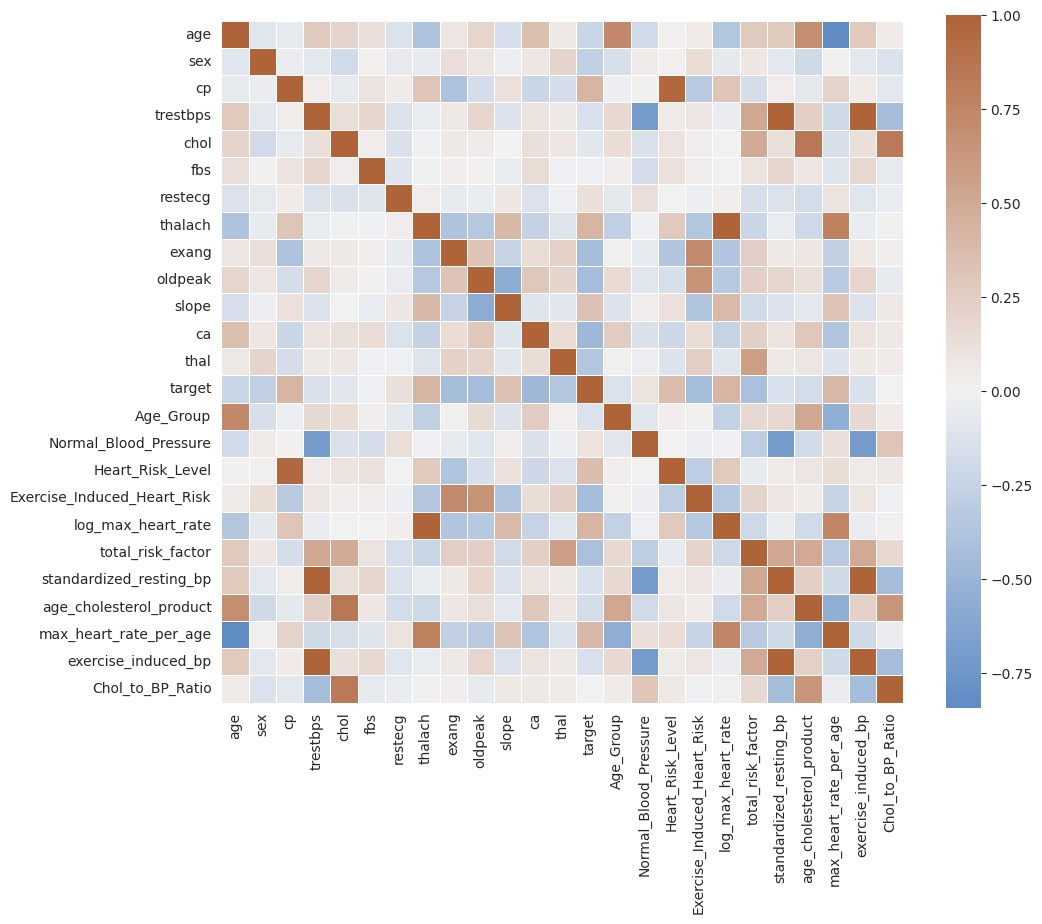

In [ ]:
corr = df3.corr(numeric_only=True)
plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 30, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5)

**Insight**
***
Mendapatkan informasi pada fitur-fitur yang sudah ditambahkan berupa Age Group, Normal Blood Pressure, Heart Risk Level, Exercise Induced Heart Risk, ST Depression Level, log max heart rate, total risk factor, standardized resting bp, age cholesterol product, max heart rate per age, exercise induced bp, Thalassemia Condition, dan Chol to BP Ratio.

## Data Training

In [ ]:
# Define the features and target
X = df3.drop(['target'],axis=1)
y = df3[['target']]
# Spliting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# Ubah format data target menjadi (n_samples, ) menggunakan ravel()
y = df3['target'].values.ravel()

features = ['Age_Group', 'Normal_Blood_Pressure', 'Heart_Risk_Level', 'Chol_to_BP_Ratio',
            'Exercise_Induced_Heart_Risk', 'ST_Depression_Level', 'total_risk_factor',
            'standardized_resting_bp', 'age_cholesterol_product', 'max_heart_rate_per_age', 'exercise_induced_bp']

# Pisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(df3[features], y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Logistic Regression dengan penambahan max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy Score: 0.78
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        92
           1       0.79      0.81      0.80       108

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [ ]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Cross-Validation Scores: [1.      0.98125 0.9625  0.9875  0.95625]
Mean CV Accuracy: 0.9775
Test Accuracy: 0.78
Precision: 0.7857142857142857
Recall: 0.8148148148148148
F1 Score: 0.7999999999999999
Confusion Matrix:
[[68 24]
 [20 88]]


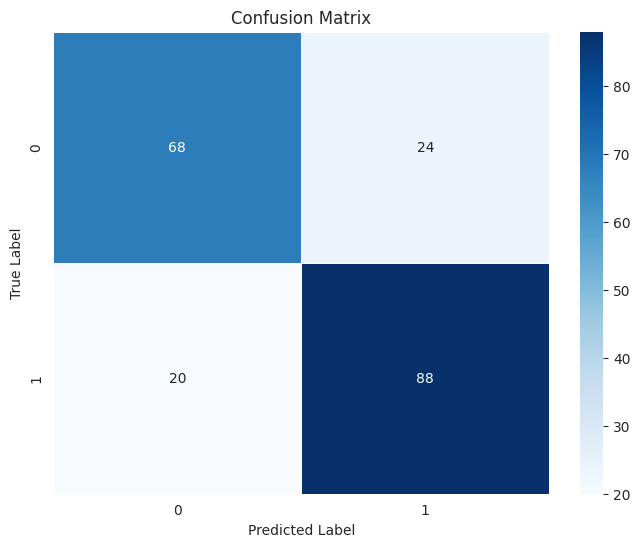

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Insight**
***
Nilai akurasi dari model adalah 0.78, yang berarti sekitar 78% dari data uji diprediksi dengan benar oleh model.
Untuk kelas 0, nilai precision 0.77, nilai recall 0.74, dan nilai F1-score 0.76, sedangkan untuk kelas 1, nilai precision 0.79, nilai recall 0.81, dan nilai F1-score 0.80.

Sedangkan untuk confusion matrix
True Positive (TP) terdapat 68 prediksi yang benar untuk kelas 0, False Positive (FP): Ada 24 prediksi yang seharusnya negatif namun salah diprediksi sebagai positif, True Negative (TN): Ada 88 prediksi yang benar untuk kelas 1, False Negative (FN): Ada 20 prediksi yang seharusnya positif namun salah diprediksi sebagai negatif.

Dengan demikian, model memiliki kinerja yang cukup baik, dengan akurasi yang layak dan nilai precision serta recall yang seimbang untuk kedua kelas.